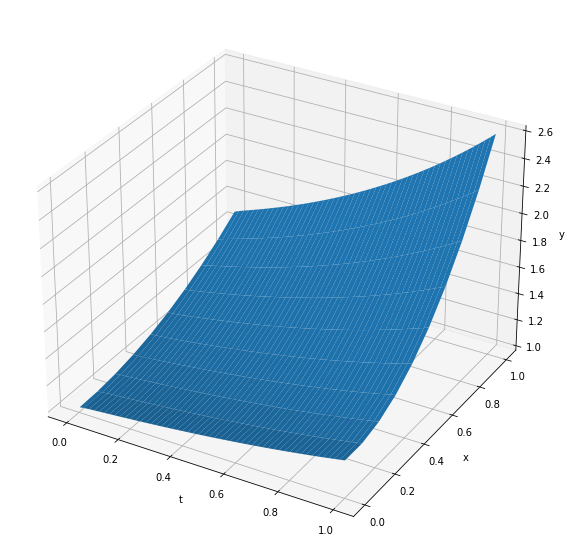

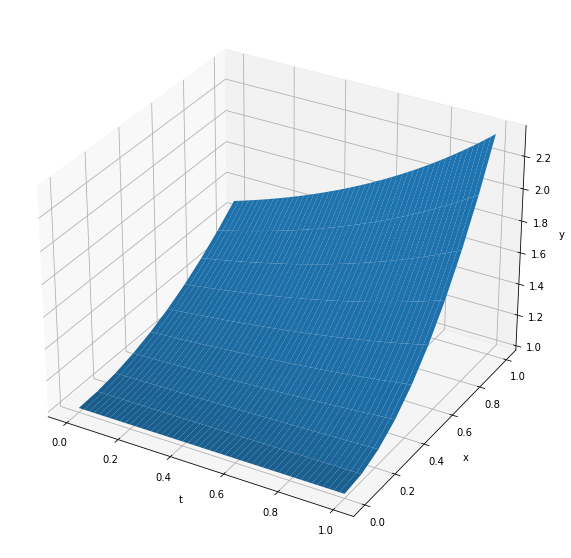

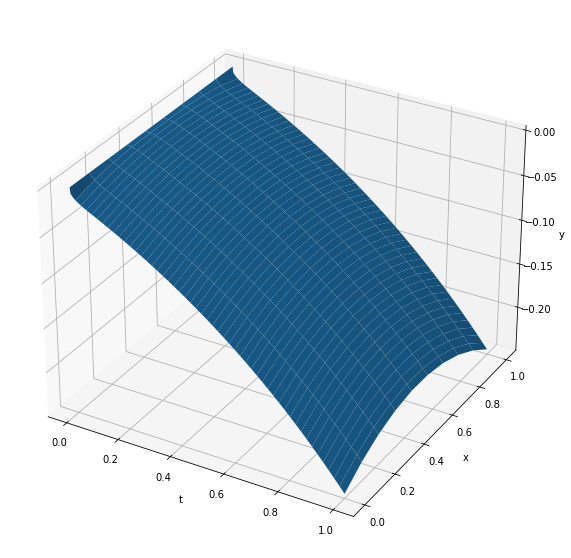

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

N = 10
M = 500
h = 1/(N-1)
tau = 1/(M-1)
e = 2.7182818284

x = np.zeros(N)
t = np.zeros(M)

for i in range(N):
    x[i] = h * i
    
for i in range(M):
    t[i] = tau * i
    

y = [[0 for j in range(M)] for i in range(N)]

for i in range(N):
    for j in range(1):
            y[i][j] = 1 + x[i]**2/2
            
for j in range(M-1):
    if j > 0:
        y[0][j] = y[1][j]
        y[N-1][j] = y[N-2][j] + e**t[j]*h
    for i in range(1,N-1):
        y[i][j+1] = (y[i-1][j]-2*y[i][j]+y[i+1][j])/(h**2)*tau+y[i][j] + e**t[j]*(x[i]**2/2-1)*tau
        
y[N-1][M-1], y[0][M-1] = y[N-2][M-1] + e**t[M-2]*h, y[1][M-1]



fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
t, x = np.meshgrid(t, x)
z = np.array(y)
surf = ax.plot_surface(t, x, z)

def f(y,x):
    return 1 + x**2*e**y/2

fig = plt.figure(figsize = (10, 10))
ax_1 = fig.add_subplot(1, 1, 1, projection = '3d')
ax_1.set_xlabel('t')
ax_1.set_ylabel('x')
ax_1.set_zlabel('y')
t = np.linspace(0,1,M)
x = np.linspace(0,1,N)
t, x = np.meshgrid(t, x)
w = f(t,x)
surf_1 = ax_1.plot_surface(t, x, w)


fig = plt.figure(figsize = (10, 10))
ax_2 = fig.add_subplot(1, 1, 1, projection = '3d')
ax_2.set_xlabel('t')
ax_2.set_ylabel('x')
ax_2.set_zlabel('y')
t = np.linspace(0,1,M)
x = np.linspace(0,1,N)
t, x = np.meshgrid(t, x)
surf_2 = ax_2.plot_surface(t, x, w - z)
